In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [4]:
import numpy as np
fish_data = np.column_stack((fish_length,fish_weight))

In [5]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
train_input , test_input,train_target,test_target = train_test_split(fish_data,fish_target,random_state=42)

In [11]:
train_input.shape, train_target.shape

((36, 2), (36,))

In [13]:
test_input.shape,test_target.shape

((13, 2), (13,))

In [15]:
train_input, test_input,train_target,test_target = train_test_split(fish_data,fish_target,stratify =fish_target,random_state=42)

In [17]:
print(test_input,test_target)

[[ 11.    9.7]
 [ 11.8   9.9]
 [ 29.7 450. ]
 [ 11.8  10. ]
 [ 26.5 340. ]
 [ 12.4  13.4]
 [ 34.  685. ]
 [ 34.  575. ]
 [ 38.5 920. ]
 [ 35.  680. ]
 [ 26.3 290. ]
 [ 31.  500. ]
 [ 41.  950. ]] [0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
kn = KNeighborsClassifier()

In [23]:
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [24]:
print(kn.predict([[25,150]]))

[0.]


In [25]:
import matplotlib.pyplot as plt

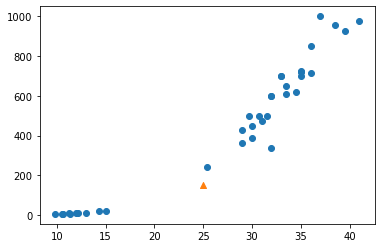

In [26]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')


In [29]:
distances, indexes = kn.kneighbors([[25,150]])

In [30]:
print (distances,indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]


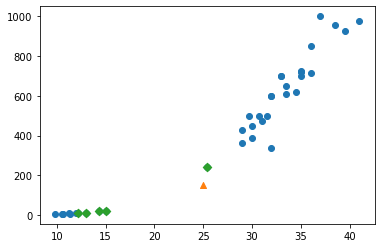

In [31]:
# 92와 130거리감이 너무 김
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')


(0.0, 1000.0)

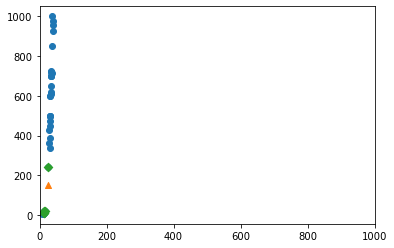

In [32]:
#기준 맞춰주기 
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlim((0,1000))


In [33]:
mean = np.mean(train_input,axis = 0)
std = np.std(train_input,axis = 0)

In [34]:
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [35]:
#표준점수로 변환
train_scaled = (train_input - mean)/std

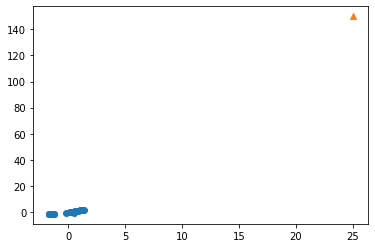

In [36]:
##전처리 데이터로 모델 훈련
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150,marker='^')

In [37]:
# 25, 150 값 표준 점수로 변환 
tmp = ([25,150]-mean) / std
tmp

array([-0.23012627, -0.94060693])

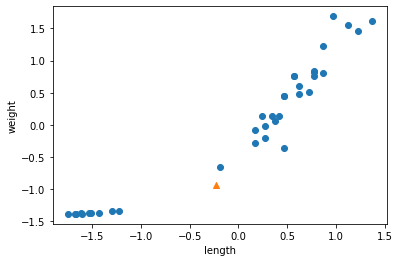

In [38]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(tmp[0],tmp[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [39]:
kn.fit(train_scaled,train_target)


KNeighborsClassifier()

In [40]:
test_scaled = (test_input -mean)/std

In [41]:
kn.score(test_scaled,test_target)

1.0

In [42]:
print(kn.predict([tmp]))

[1.]


In [43]:
dis,ind = kn.kneighbors([tmp])

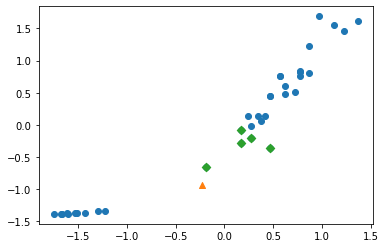

In [44]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(tmp[0],tmp[1],marker='^')
plt.scatter(train_scaled[ind,0],train_scaled[ind,1],marker='D')
plt.show()